In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import qiskit_aer.noise as noise

# Noise Models (qiskit_aer.noise)
[Link](https://qiskit.github.io/qiskit-aer/apidocs/aer_noise.html)

This module contains classes and functions to build a noise model for simulating a Qiskit quantum circuit in the presence of errors.

## Building Noise Models
The NoiseModel class is used to represent noise model for the QasmSimulator. It can be used to construct custom noise models for simulator, to automatically generate a basic device noise model for an IBMQ or fake backend.

## Device Noise Models
A simplified approximate NoiseModel can be generated automatically from the properties of real device backends from the IBMQ provider or fake backends of the fake_provider using the NoiseModel.from_backend() method. See the method documentation for details.

In [4]:

# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

In [5]:
# Get basis gates from noise model
basis_gates = noise_model.basis_gates

In [6]:
# Make a circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

In [7]:
backend = AerSimulator(noise_model=noise_model,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(circ, backend)

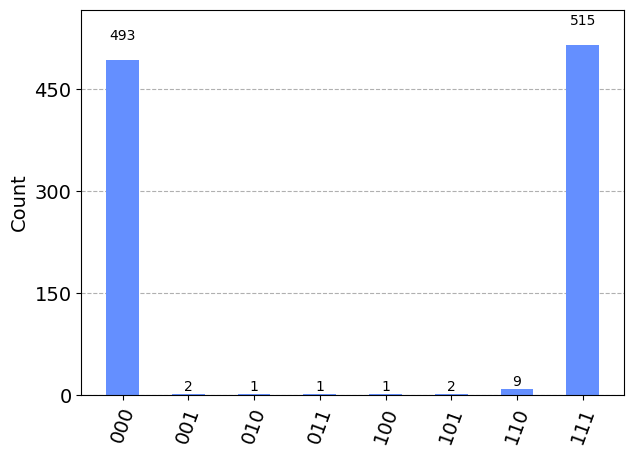

In [8]:
result = backend.run(transpiled_circuit).result()

counts = result.get_counts(0)
plot_histogram(counts)

In [9]:
print(result)

Result(backend_name='aer_simulator', backend_version='0.13.3', qobj_id='', job_id='7c040679-196e-492d-a5de-3a66a7145bca', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x5': 2, '0x0': 493, '0x2': 1, '0x4': 1, '0x1': 2, '0x6': 9, '0x3': 1, '0x7': 515}), header=QobjExperimentHeader(creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-186', qreg_sizes=[['q', 3]]), status=DONE, seed_simulator=1907688846, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000665379, 'noise': 'superop', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'time_taken': 0.002553229, 'measure_sampling': True, 'num_clbits': 3, 'max_memory_mb': 16384, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'density_matrix', 'required_memory